We load the libraries to be used in the experimentation

In [3]:
import numpy as np
import pandas as pd

from scipy.stats import f_oneway, ttest_ind, shapiro
import scipy.stats as ss
import scikit_posthocs as sp

Continue loading the data of the populations to be tested:

In [4]:
data_arch1 = [
    ['max', 0.7415, 0.7421, 0.7396, 0.7423, 0.742],
    ['avg', 0.7487, 0.758, 0.7562, 0.7452, 0.7562],
    ['m_1.5', 0.7581, 0.7584, 0.7563, 0.7616, 0.753],
    ['m_2', 0.7508, 0.749, 0.7535, 0.7527, 0.7499],
    ['m_2.5', 0.7576, 0.7544, 0.7558, 0.7508, 0.756],
    ['m_3', 0.7476, 0.7515, 0.7438, 0.7555, 0.7558],
]

data_values = [values[1:] for values in data_arch1]
df = pd.DataFrame(data=data_arch1, columns=['Model', 'Test1', 'Test2', 'Test3', 'Test4', 'Test5'])
df = df.set_index('Model')

We start by testing for normality in each population:

In [5]:
for pop in data_arch1:
    test_result = ss.shapiro(pop[1:])
    print('Shapiro test result for grouping {}: {}'.format(pop[0], test_result))
    if (test_result[1] > 0.05):
        print('We cannot discard that the previous population was sampled from a normal distribution')

Shapiro test result for grouping max: ShapiroResult(statistic=0.7738790512084961, pvalue=0.04879090189933777)
Shapiro test result for grouping avg: ShapiroResult(statistic=0.8535849452018738, pvalue=0.20611828565597534)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping m_1.5: ShapiroResult(statistic=0.9761701226234436, pvalue=0.9131672382354736)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping m_2: ShapiroResult(statistic=0.9449402093887329, pvalue=0.701041579246521)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping m_2.5: ShapiroResult(statistic=0.9127028584480286, pvalue=0.48400217294692993)
We cannot discard that the previous population was sampled from a normal distribution
Shapiro test result for grouping m_3: ShapiroResult(statistic=0.9143377542495728, pvalue=0.49409121274948

All populations seem to be normal, so we apply statistical tests that allow for normality. We now will perform ANOVA testing in all populations to check if there are statistical differences among them:

<font color='red'>Warning</font>: Populations are very small (n = 5, n < 20), so populations may not really be normal. Further experimenting could be necessary.

In [6]:
test_result = ss.f_oneway(*data_values, axis=0)
print(test_result)

F_onewayResult(statistic=11.356686288875999, pvalue=1.0604516165604626e-05)


The p-value obtained is well beyond the imposed threshold of 0.05, so we can safely discard the null hypothesis that all populations are equal (and thus, there must be some model whose accuracies are statistically better or worse than those of the rest). 

We now need to find out which models are statistically different via post-hoc tests between each pair of tests.

In [7]:
data_values_np = np.array(data_values)
sp.posthoc_anderson(data_values_np)

/home/iosu.rodriguez/anaconda3/envs/pytorch/lib/python3.9/site-packages/scikit_posthocs/_posthocs.py:1214: UserWarning: p-value capped: true value larger than 0.25
  vs[i, j] = ss.anderson_ksamp([x.loc[x[_group_col] == groups[i], _val_col], x.loc[x[_group_col] == groups[j], _val_col]], midrank=midrank)[2]


,1,2,3,4,5,6
1,1.000000,0.003769,0.004356,0.004356,0.004356,0.004356
2,0.003769,1.000000,0.076000,0.140970,0.250000,0.219282
3,0.004356,0.076000,1.000000,0.010368,0.121731,0.021065
4,0.004356,0.140970,0.010368,1.000000,0.026977,0.250000
5,0.004356,0.250000,0.121731,0.026977,1.000000,0.168181
6,0.004356,0.219282,0.021065,0.250000,0.168181,1.000000


(<AxesSubplot:>, <matplotlib.colorbar.ColorbarBase at 0x7f9f33aa0430>)

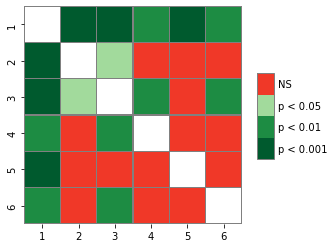

In [8]:
pc = sp.posthoc_conover(data_values_np)
cmap = ['#FFFFFF', "#F03828", '#005A2E', '#1D8C43', '#A2DA9C']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
# heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)